In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 15

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 15)                165       
                                                                 
Total params: 1235 (4.82 KB)
Trainable params: 1235 (4.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000


1/8 [==>...........................] - ETA: 5s - loss: 2.7643 - accuracy: 0.0547
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 1s 37ms/step - loss: 2.7411 - accuracy: 0.0445 - val_loss: 2.7249 - val_accuracy: 0.0032
Epoch 2/1000
1/8 [==>...........................] - ETA: 0s - loss: 2.6998 - accuracy: 0.0469
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 8ms/step - loss: 2.7244 - accuracy: 0.0695 - val_loss: 2.7077 - val_accuracy: 0.1526
Epoch 3/1000
1/8 [==>...........................] - ETA: 0s - loss: 2.6906 - accuracy: 0.1328
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 9ms/step - loss: 2.6988 - accuracy: 0.1151 - val_loss: 2.6922 - val_accuracy: 0.1331
Epoch 4/1000
1/8 [==>...........................] - ETA: 0s - loss: 2.6537 - accuracy: 0.1562

D:\GodotProjects\tddd57-labs\hand-gesture-recognition-mediapipe\venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 4: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 9ms/step - loss: 2.6734 - accuracy: 0.1466 - val_loss: 2.6758 - val_accuracy: 0.1331
Epoch 5/1000
1/8 [==>...........................] - ETA: 0s - loss: 2.6875 - accuracy: 0.1172
Epoch 5: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 9ms/step - loss: 2.6587 - accuracy: 0.1618 - val_loss: 2.6611 - val_accuracy: 0.1331
Epoch 6/1000
1/8 [==>...........................] - ETA: 0s - loss: 2.6037 - accuracy: 0.1719
Epoch 6: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 9ms/step - loss: 2.6257 - accuracy: 0.1607 - val_loss: 2.6459 - val_accuracy: 0.1331
Epoch 7/1000
1/8 [==>...........................] - ETA: 0s - loss: 2.6413 - accuracy: 0.1562
Epoch 7: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [===========================

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

3/3 [==============================] - 0s 2ms/step - loss: 0.6709 - accuracy: 0.7727


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 76ms/step
[9.13780605e-05 1.41502157e-11 1.15959125e-03 3.99336040e-01
 5.29901008e-04 1.39053002e-01 1.66502933e-03 6.27433211e-02
 1.67080737e-03 3.90375704e-01 8.03064380e-04 1.10927620e-03
 1.22713745e-05 8.29466218e-10 1.45053421e-03]
3


# Confusion matrix

10/10 [==============================] - 0s 1000us/step


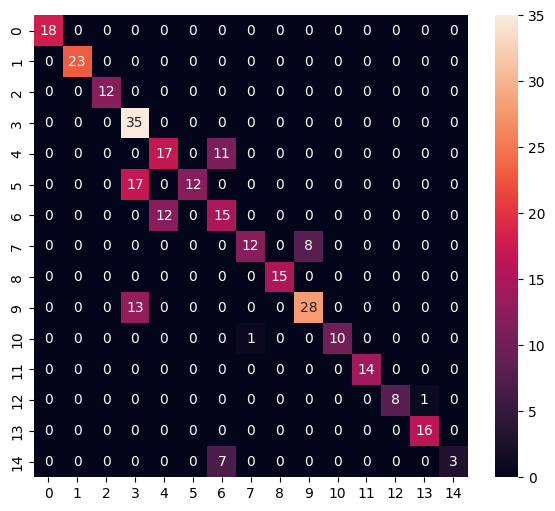

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        12
           3       0.54      1.00      0.70        35
           4       0.59      0.61      0.60        28
           5       1.00      0.41      0.59        29
           6       0.45      0.56      0.50        27
           7       0.92      0.60      0.73        20
           8       1.00      1.00      1.00        15
           9       0.78      0.68      0.73        41
          10       1.00      0.91      0.95        11
          11       1.00      1.00      1.00        14
          12       1.00      0.89      0.94         9
          13       0.94      1.00      0.97        16
          14       1.00      0.30      0.46        10

    accuracy                           0.77       308
   macro avg       0.88      0.80      0.81       308
weig

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.savefig("model/keypoint_classifier/current_confusion_matrix.png")
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

D:\GodotProjects\tddd57-labs\hand-gesture-recognition-mediapipe\venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Albin\AppData\Local\Temp\tmpkcq9su68\assets


INFO:tensorflow:Assets written to: C:\Users\Albin\AppData\Local\Temp\tmpkcq9su68\assets


7028

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[9.1378002e-05 1.4150220e-11 1.1595915e-03 3.9933616e-01 5.2990089e-04
 1.3905294e-01 1.6650284e-03 6.2743314e-02 1.6708055e-03 3.9037564e-01
 8.0306502e-04 1.1092765e-03 1.2271378e-05 8.2946638e-10 1.4505333e-03]
3
